In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
autos = pd.read_csv('autos.csv', encoding = 'Latin 1')
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


I thought an analisis on car price, what are the main predictors on price.

In [19]:
autos.columns
autos.rename(columns={'yearOfRegistration':'registration_year',
                          'monthofregistration':'registration_month',
                          'dataCreated':'ad_created'}, 
                 inplace=True)

autos['price'] = (autos['price'].replace('$','').replace(',','').astype(int))
autos['odometer'] = (autos['kilometer'].replace('km','').replace(',','').astype(int))


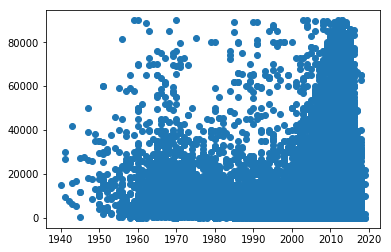

In [32]:
#retirar carros de luxo(carros com valor acima de 1 milhas) e carros de valor 0
autos = autos[autos['price'].between(10,100000)]
autos = autos[autos['odometer'].between(0,1000000)]
autos = autos[autos['registration_year'].between(1940,2020)]
price_auto = autos['price']
km_auto = autos['odometer']
year_auto = autos['registration_year']
plt.scatter(year_auto,price_auto)
plt.show()


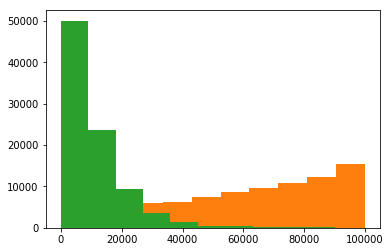

In [44]:
# histograma das idades dos carros por decada
grafico1 = plt.hist(year_auto, bins=10)
grafico2 = plt.hist(km_auto, bins=10)
grafico3 = plt.hist(price_auto,bins=10)
plt.show()

In [49]:
#preco medio dos carros entre as marcas  
unique_brands = ['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'mazda', 'nissan', 'smart',
       'citroen', 'toyota', 'sonstige_autos']
brand_mean_price = {}
brand_mean_km = {}
for i in unique_brands:
    mean_price = autos['price'][autos['brand'] == i].mean()
    brand_mean_price[i] = mean_price
for i in unique_brands:
    mean_mileage = autos['odometer'][autos['brand'] == i].mean()
    brand_mean_km[i] = mean_mileage
print(brand_mean_price)
print(brand_mean_km)

{'volkswagen': 11173.386623555476, 'bmw': 17591.10646387833, 'opel': 6226.6216806111315, 'mercedes_benz': 16936.506889909615, 'audi': 19481.49845488257, 'ford': 6934.330378250591, 'renault': 4959.3803649447445, 'peugeot': 5985.540819841543, 'fiat': 5001.513590391909, 'seat': 8776.708169291338, 'skoda': 9846.937737642585, 'mazda': 8518.062314540059, 'nissan': 8431.822149837133, 'smart': 4772.920687134503, 'citroen': 6125.7320512820515, 'toyota': 7915.44270507201, 'sonstige_autos': 14029.381420765027}
{'volkswagen': 61903.17945033232, 'bmw': 65046.797309154725, 'opel': 65132.77555474718, 'mercedes_benz': 63692.398873907245, 'audi': 59810.72311495674, 'ford': 66100.02955082743, 'renault': 66039.57851452069, 'peugeot': 68801.24009645195, 'fiat': 63517.69911504425, 'seat': 62861.7125984252, 'skoda': 62528.51711026616, 'mazda': 64859.05044510386, 'nissan': 64530.944625407166, 'smart': 65354.53216374269, 'citroen': 66615.38461538461, 'toyota': 65165.936130244205, 'sonstige_autos': 48360.65573